# Analyse des Gesamtdatensatz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from my_plot import set_size

%matplotlib inline

In [3]:
df = pd.read_parquet("data/raw/2023-06-23_gesamtdaten_rhein_neckar.parquet")
df_fillna = df.fillna('k. A.')
width = 'thesis'

In [18]:
len(df)

68663

## Nach Dokumententypen

In [27]:
df.doc_typ.unique()

array(['Vorlage', 'Anhang Vorlage', 'Beschluss', 'Anfrage', 'Antrag',
       'Niederschrift', 'Anhang Sitzung', 'Bekanntmachung', 'k. A.',
       'Anhang Beschluss'], dtype=object)

In [4]:
doc_typ = ['Bekanntmachung', 'Vorlage', 'Anfrage', 'Antrag', 'Beschluss', 'Niederschrift',
           'Anhang Sitzung', 'Anhang Vorlage', 'Anhang Beschluss', 'k. A.']

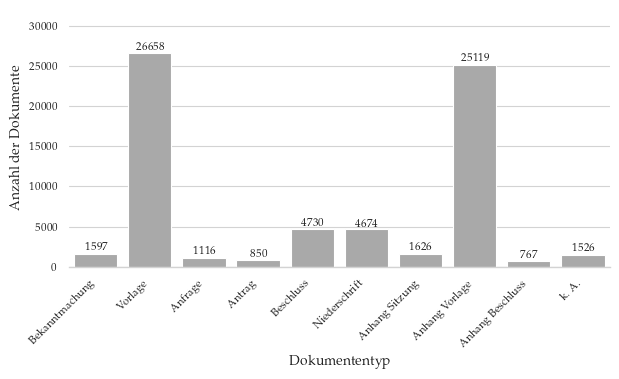

In [9]:
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

ax = sns.countplot(x='doc_typ', data=df_fillna, order=doc_typ, color='darkgrey')
ax.set(xlabel='Dokumententyp', ylabel='Anzahl der Dokumente')
sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
fig.autofmt_xdate(rotation=45)
# add annotations
for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)
sns.despine(left=True)

plt.tight_layout()

# Save and remove excess whitespace
fig.savefig('../../latex/Figures/plots/gesamt_dokumententypen.pdf', format='pdf', bbox_inches='tight')

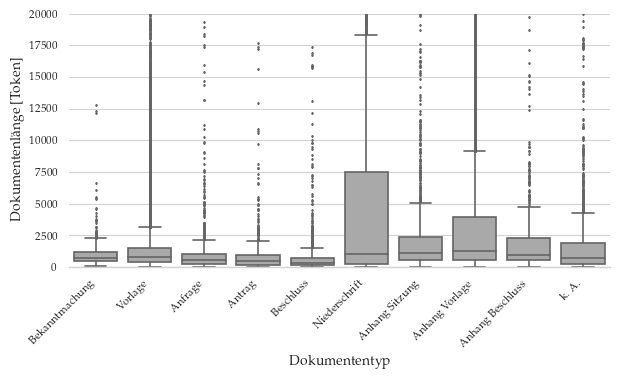

In [10]:
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

ax = sns.boxplot(x='doc_typ', y='token_laenge', data=df_fillna, order=doc_typ, color='darkgrey', flierprops = dict(markerfacecolor = '0.50', markersize = 1))
ax.set(xlabel='Dokumententyp', ylabel='Dokumentenlänge [Token]')
ax.set_ylim([0, 20000])
# sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
fig.autofmt_xdate(rotation=45)
for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)
sns.despine(left=True)
plt.tight_layout()

# Save and remove excess whitespace
fig.savefig('../../latex/Figures/plots/gesamt_dokumententypen_token_laenge.pdf', format='pdf', bbox_inches='tight')

## Nach Kommune

In [20]:
df.kommune.value_counts()/len(df)*100

kommune
Frankenthal           10.596682
Landau                 8.838821
Lampertheim            8.394623
Speyer                 8.254810
Kreis Bergstraße       7.596522
Schwetzingen           5.924588
Schifferstadt          5.521169
Viernheim              5.451262
Rhein-Pfalz-Kreis      5.259019
Hassloch               3.939531
Heppenheim             3.868168
Bad Friedrichshall     3.441446
Kreis Heilbronn        2.869085
Bad Dürkheim           2.618586
Hockenheim             2.500619
Kreis Bad Dürkheim     2.356437
Pirmasens              2.264684
Bad Rappenau           2.028749
Rhein-Neckar-Kreis     1.967581
Wörth am Rhein         1.928258
Homburg                1.463670
Kreis Germersheim      1.217541
Wiesloch               0.939371
Leimen                 0.308754
Weinheim               0.300016
Bensheim               0.081558
Saarpfalz-Kreis        0.068450
Name: count, dtype: float64

In [25]:
df.kommune.unique()

array(['Bad Dürkheim', 'Bad Friedrichshall', 'Bad Rappenau', 'Bensheim',
       'Frankenthal', 'Hassloch', 'Heppenheim', 'Hockenheim', 'Homburg',
       'Lampertheim', 'Landau', 'Leimen', 'Pirmasens', 'Schwetzingen',
       'Schifferstadt', 'Speyer', 'Viernheim', 'Weinheim', 'Wiesloch',
       'Wörth am Rhein', 'Kreis Bad Dürkheim', 'Kreis Bergstraße',
       'Kreis Germersheim', 'Kreis Heilbronn', 'Rhein-Neckar-Kreis',
       'Rhein-Pfalz-Kreis', 'Saarpfalz-Kreis'], dtype=object)

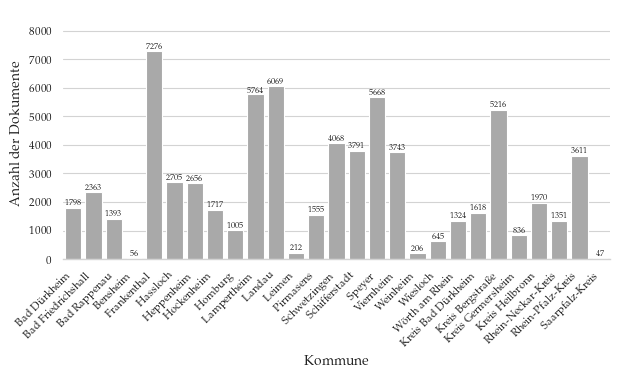

In [13]:
# Initialise figure instance
fig, ax = plt.subplots(1, 1,figsize=set_size(width))

ax = sns.countplot(x='kommune', data=df_fillna, color='darkgrey')
ax.set(xlabel='Kommune', ylabel='Anzahl der Dokumente')
sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
fig.autofmt_xdate(rotation=45)
for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=6)
ax.margins(y=0.2)
sns.despine(left=True)
plt.tight_layout()

# Save and remove excess whitespace
fig.savefig('../../latex/Figures/plots/gesamtdokumente_kommunen.pdf', format='pdf')

## Nach Beratungsergebnis

In [101]:
df.beschlussstatus.unique()

array(['k. A.', 'beschlossen', 'zur Kenntnis genommen', 'vertagt',
       'abgelehnt', 'zurückgezogen', 'abgesetzt', 'Teilbeschlüsse',
       'offen'], dtype=object)

In [14]:
df['beschlussstatus_bool'] = df['beschlussstatus'].apply(lambda x: bool(x))

In [6]:
df['beschlussstatus_bool'].value_counts()

beschlussstatus_bool
False    52527
True     16136
Name: count, dtype: int64

In [15]:
beschlussstatus = ['beschlossen','Teilbeschlüsse','abgelehnt', 'zur Kenntnis genommen','zurückgezogen',
                  'vertagt', 'abgesetzt', 'offen']
beschlussstatus_label = ['beschlossen','Teilbeschlüsse','abgelehnt', 'zur Kenntnis\ngenommen','zurückgezogen',
                  'vertagt', 'abgesetzt', 'offen']

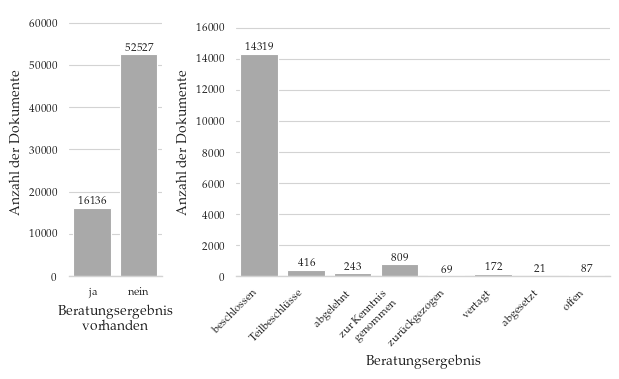

In [17]:
# Initialise figure instance
fig, ax = plt.subplots(1, 2,figsize=set_size(width), width_ratios=[1, 4])
sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')

plt.subplot(1, 2, 1)
ax = sns.countplot(x='beschlussstatus_bool', data=df, color='darkgrey', order=[True, False])
plt.xticks([False, True], ['ja', 'nein'])
ax.set(xlabel='Beratungsergebnis\nvorhanden', ylabel='Anzahl der Dokumente')
for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)

plt.subplot(1, 2, 2)
ax = sns.countplot(x='beschlussstatus', data=df, color='darkgrey', order=beschlussstatus)
ax.set(xlabel='Beratungsergebnis', ylabel='Anzahl der Dokumente')

ax.set_xticklabels(beschlussstatus_label, rotation=45, ha='right')
for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)
sns.despine(left=True)

plt.tight_layout()

# Save and remove excess whitespace
fig.savefig('../../latex/Figures/plots/gesamt_beratungsergebnis.pdf', format='pdf')

## Nach Jahren

In [3]:
df_year = df.groupby('jahr')['text'].agg({'count'})

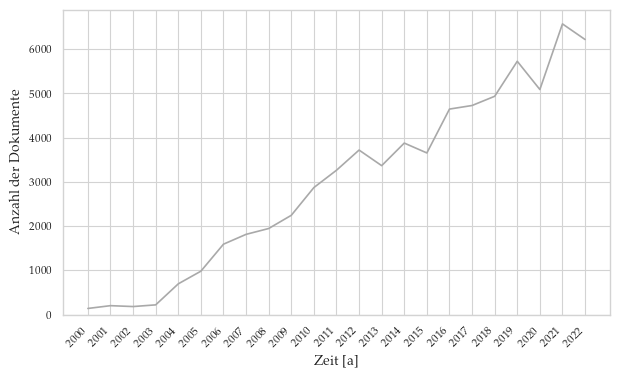

In [24]:
# Initialise figure instance
fig, ax = plt.subplots(1, 1,figsize=set_size(width))
plt.style.use('tex.mplstyle')
# sns.set_style('whitegrid')
ax = sns.lineplot(x=df_year.index, y='count', data=df_year, color='darkgrey')
ax.set(xlabel='Zeit [a]', ylabel='Anzahl der Dokumente')
ax.set_ylim(bottom=0)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()

# Save and remove excess whitespace
fig.savefig('../../latex/Figures/plots/gesamt_jahre.pdf', format='pdf')

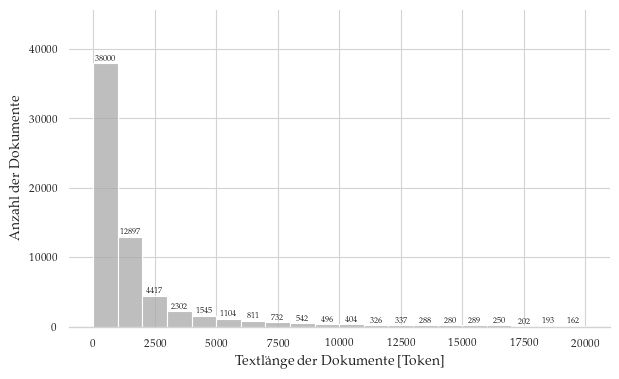

In [29]:
# Initialise figure instance
# fig, ax = plt.subplots(1, 1,figsize=set_size(width))
sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
g = sns.displot(df, x='token_laenge', bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,
                                            9000,10000,11000,12000,13000,14000,15000,16000,17000,
                                           18000,19000,20000],
               color='darkgrey')
g.fig.set_size_inches(set_size(width))
g.set(xlabel='Textlänge der Dokumente [Token]', ylabel='Anzahl der Dokumente')
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge', fontsize=6)
    ax.margins(y=0.2)

sns.despine(left=True)

plt.tight_layout()

# Save and remove excess whitespace
g.savefig('../../latex/Figures/plots/gesamt_tokenlaenge.pdf', format='pdf')

In [50]:
from datetime import date
from dateutil import relativedelta

In [33]:
df_date = df.groupby(['kommune']).agg({'datum': [min, max]})

In [60]:
df_date['zeitspanne'] = df_date['datum']['max'] - df_date['datum']['min']

In [62]:
df_date['zeitspanne'] = pd.to_timedelta(df_date['zeitspanne'])

In [74]:
df_date.reset_index(inplace=True)

In [77]:
df_date['zeitspanne'].describe()

count                              27
mean               4657 days 13:20:00
std      2120 days 21:07:20.877916928
min                 455 days 00:00:00
25%                3134 days 12:00:00
50%                5005 days 00:00:00
75%                6258 days 00:00:00
max                8330 days 00:00:00
Name: zeitspanne, dtype: object

In [4]:
df.ocr.value_counts()/ len(df)

ocr
False    0.87778
True     0.12222
Name: count, dtype: float64

In [5]:
df[df['beschlussstatus'].notna()]['kommune'].unique()


array(['Hockenheim', 'Homburg', 'Lampertheim', 'Landau', 'Viernheim',
       'Kreis Germersheim', 'Kreis Heilbronn', 'Rhein-Neckar-Kreis'],
      dtype=object)

In [6]:
len(df)

68663

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68663 entries, 0 to 68662
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   text                      68663 non-null  object        
 1   datum                     68663 non-null  datetime64[ns]
 2   doc_name                  66889 non-null  object        
 3   file_urls                 58062 non-null  object        
 4   gremium                   68663 non-null  object        
 5   kommunale_ebene           68558 non-null  object        
 6   kommune                   68663 non-null  object        
 7   datei_name                59282 non-null  object        
 8   rel_path_to_file          59282 non-null  object        
 9   sitzung_nr                67825 non-null  float64       
 10  beschlussstatus           16136 non-null  object        
 11  top_name                  56011 non-null  object        
 12  top_nr            